# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: There is a greater range of GRE scores students can receive (220 to 800 in this sample) while GPA scores can only have a value from 1.0 to 4.0 (2.26 to 4.00 in this sample). 

#### Question 4. Drop data points with missing data


In [24]:
df_raw.dropna()
df = df_raw.dropna()
print df_raw.dropna()

     admit  gre   gpa  prestige
0        0  380  3.61         3
1        1  660  3.67         3
2        1  800  4.00         1
3        1  640  3.19         4
4        0  520  2.93         4
5        1  760  3.00         2
6        1  560  2.98         1
7        0  400  3.08         2
8        1  540  3.39         3
9        0  700  3.92         2
10       0  800  4.00         4
11       0  440  3.22         1
12       1  760  4.00         1
13       0  700  3.08         2
14       1  700  4.00         1
15       0  480  3.44         3
16       0  780  3.87         4
17       0  360  2.56         3
18       0  800  3.75         2
19       1  540  3.81         1
20       0  500  3.17         3
21       1  660  3.63         2
22       0  600  2.82         4
23       0  680  3.19         4
24       1  760  3.35         2
25       1  800  3.66         1
26       1  620  3.61         1
27       1  520  3.74         4
28       1  780  3.22         2
29       0  520  3.29         1
..     .

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

In [25]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

/Users/eleanor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


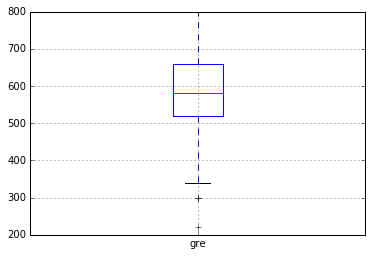

In [15]:
#boxplot 1
df_raw.boxplot(column='gre')

/Users/eleanor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x11a922b10>],
 'caps': [<matplotlib.lines.Line2D at 0x11a931a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a93dcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a827a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a922d10>,
  <matplotlib.lines.Line2D at 0x11a931410>]}

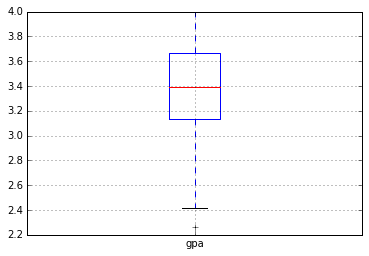

In [20]:
#boxplot 2 
df_raw.boxplot(column='gpa')

#### Question 7. What do this plots show?

Answer: Box plots show the distribution of the data. The solid black lines show the min and max of the data range, the red line is the median, the bottom of the blue box is the first quartile and the top is the third quartile. The space between the two is the likely range of variation. The + are outliers. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac4c750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b8ec550>]], dtype=object)

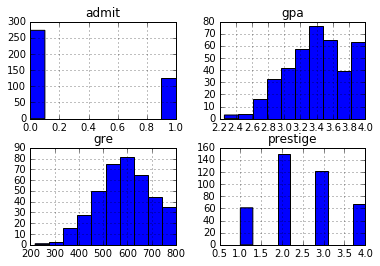

In [25]:
# plot the distribution of each variable 
df_raw.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: GRE is the closest to normal, pretige is also close, but they are all skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Maybe. Depends on the type of analysis you're doing. We could change GPA to a categorical variable which might help normalize it. A transformation might be needed. You would use dummy variables to do the transformation.

#### Question 11. Which of our variables are potentially colinear? 

In [6]:
# create a correlation matrix for the data
df_raw.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: The values are between -.7 and .7 they aren't collinear. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Because there's a negative correlation, we would show that admissions rates decline as prestige rankings decline. 

#### Question 14. What is your hypothesis? 

Answer: That students who attended undergraduate institutions with greater prestige are less likely to be admitted to graduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data